# The Hénon Map: A Classic Discrete-Time Dynamical System

## Introduction

The **Hénon map** is one of the most studied discrete-time dynamical systems exhibiting chaotic behavior. Introduced by Michel Hénon in 1976, it was originally devised as a simplified model of the Poincaré section of the Lorenz system. Despite its simplicity, the Hénon map displays remarkably rich dynamics, including periodic orbits, strange attractors, and sensitive dependence on initial conditions.

## Mathematical Formulation

The Hénon map is a two-dimensional iterated map defined by the following system of difference equations:

$$\begin{aligned}
x_{n+1} &= 1 - a x_n^2 + y_n \\
y_{n+1} &= b x_n
\end{aligned}$$

where:
- $(x_n, y_n)$ represents the state of the system at iteration $n$
- $a$ and $b$ are control parameters

The classical parameter values that produce a chaotic attractor are:
- $a = 1.4$
- $b = 0.3$

## Properties of the Hénon Map

### Jacobian and Contraction

The Jacobian matrix of the Hénon map is:

$$J = \begin{pmatrix} \frac{\partial x_{n+1}}{\partial x_n} & \frac{\partial x_{n+1}}{\partial y_n} \\ \frac{\partial y_{n+1}}{\partial x_n} & \frac{\partial y_{n+1}}{\partial y_n} \end{pmatrix} = \begin{pmatrix} -2ax_n & 1 \\ b & 0 \end{pmatrix}$$

The determinant of the Jacobian is:

$$\det(J) = -b$$

For $|b| < 1$, the map is **dissipative**, meaning it contracts phase space volume by a factor of $|b|$ at each iteration. This contraction is essential for the existence of a strange attractor.

### Strange Attractor

The Hénon attractor has a **fractal structure** with a Hausdorff dimension approximately equal to $1.261 \pm 0.003$. The attractor exhibits **self-similarity** at different scales, a hallmark of fractal geometry.

### Lyapunov Exponents

The Lyapunov exponents for the classical Hénon map are approximately:
- $\lambda_1 \approx 0.42$ (positive, indicating chaos)
- $\lambda_2 \approx -1.62$ (negative, indicating contraction)

The positive Lyapunov exponent confirms the sensitive dependence on initial conditions characteristic of chaotic systems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
def henon_map(x, y, a=1.4, b=0.3):
    """
    Compute one iteration of the Hénon map.
    
    Parameters:
    -----------
    x, y : float
        Current state coordinates
    a, b : float
        Control parameters (default: classical chaotic values)
    
    Returns:
    --------
    x_new, y_new : float
        Next state coordinates
    """
    x_new = 1 - a * x**2 + y
    y_new = b * x
    return x_new, y_new


def generate_henon_attractor(a=1.4, b=0.3, n_iterations=100000, n_transient=1000, x0=0.1, y0=0.1):
    """
    Generate the Hénon attractor by iterating the map.
    
    Parameters:
    -----------
    a, b : float
        Control parameters
    n_iterations : int
        Number of iterations to compute
    n_transient : int
        Number of transient iterations to discard
    x0, y0 : float
        Initial conditions
    
    Returns:
    --------
    x_values, y_values : ndarray
        Arrays of attractor coordinates
    """
    # Initialize arrays
    x_values = np.zeros(n_iterations)
    y_values = np.zeros(n_iterations)
    
    # Set initial conditions
    x, y = x0, y0
    
    # Discard transient
    for _ in range(n_transient):
        x, y = henon_map(x, y, a, b)
    
    # Generate attractor
    for i in range(n_iterations):
        x, y = henon_map(x, y, a, b)
        x_values[i] = x
        y_values[i] = y
    
    return x_values, y_values

In [3]:
# Generate the classical Hénon attractor
x_attractor, y_attractor = generate_henon_attractor(a=1.4, b=0.3, n_iterations=100000)

print(f"Generated {len(x_attractor)} points on the Hénon attractor")
print(f"x range: [{x_attractor.min():.4f}, {x_attractor.max():.4f}]")
print(f"y range: [{y_attractor.min():.4f}, {y_attractor.max():.4f}]")

Generated 100000 points on the Hénon attractor
x range: [-1.2846, 1.2730]
y range: [-0.3854, 0.3819]


In [4]:
def compute_lyapunov_exponent(a=1.4, b=0.3, n_iterations=10000, n_transient=1000):
    """
    Compute the largest Lyapunov exponent of the Hénon map.
    
    Uses the standard algorithm based on tracking the evolution
    of an infinitesimal perturbation.
    
    Returns:
    --------
    lyapunov : float
        Largest Lyapunov exponent
    """
    x, y = 0.1, 0.1
    
    # Discard transient
    for _ in range(n_transient):
        x, y = henon_map(x, y, a, b)
    
    # Initialize tangent vector
    lyapunov_sum = 0.0
    
    for _ in range(n_iterations):
        # Jacobian at current point
        J = np.array([[-2*a*x, 1], [b, 0]])
        
        # Compute eigenvalues
        eigenvalues = np.linalg.eigvals(J)
        
        # Add log of largest eigenvalue magnitude
        lyapunov_sum += np.log(np.max(np.abs(eigenvalues)))
        
        # Iterate the map
        x, y = henon_map(x, y, a, b)
    
    return lyapunov_sum / n_iterations

# Compute Lyapunov exponent
lyap = compute_lyapunov_exponent()
print(f"Largest Lyapunov exponent: λ ≈ {lyap:.4f}")
print(f"Positive value confirms chaotic behavior.")

Largest Lyapunov exponent: λ ≈ 0.6201
Positive value confirms chaotic behavior.


## Visualization of the Hénon Attractor

The following figure displays the strange attractor of the Hénon map, along with a zoomed view showing its fractal self-similar structure.

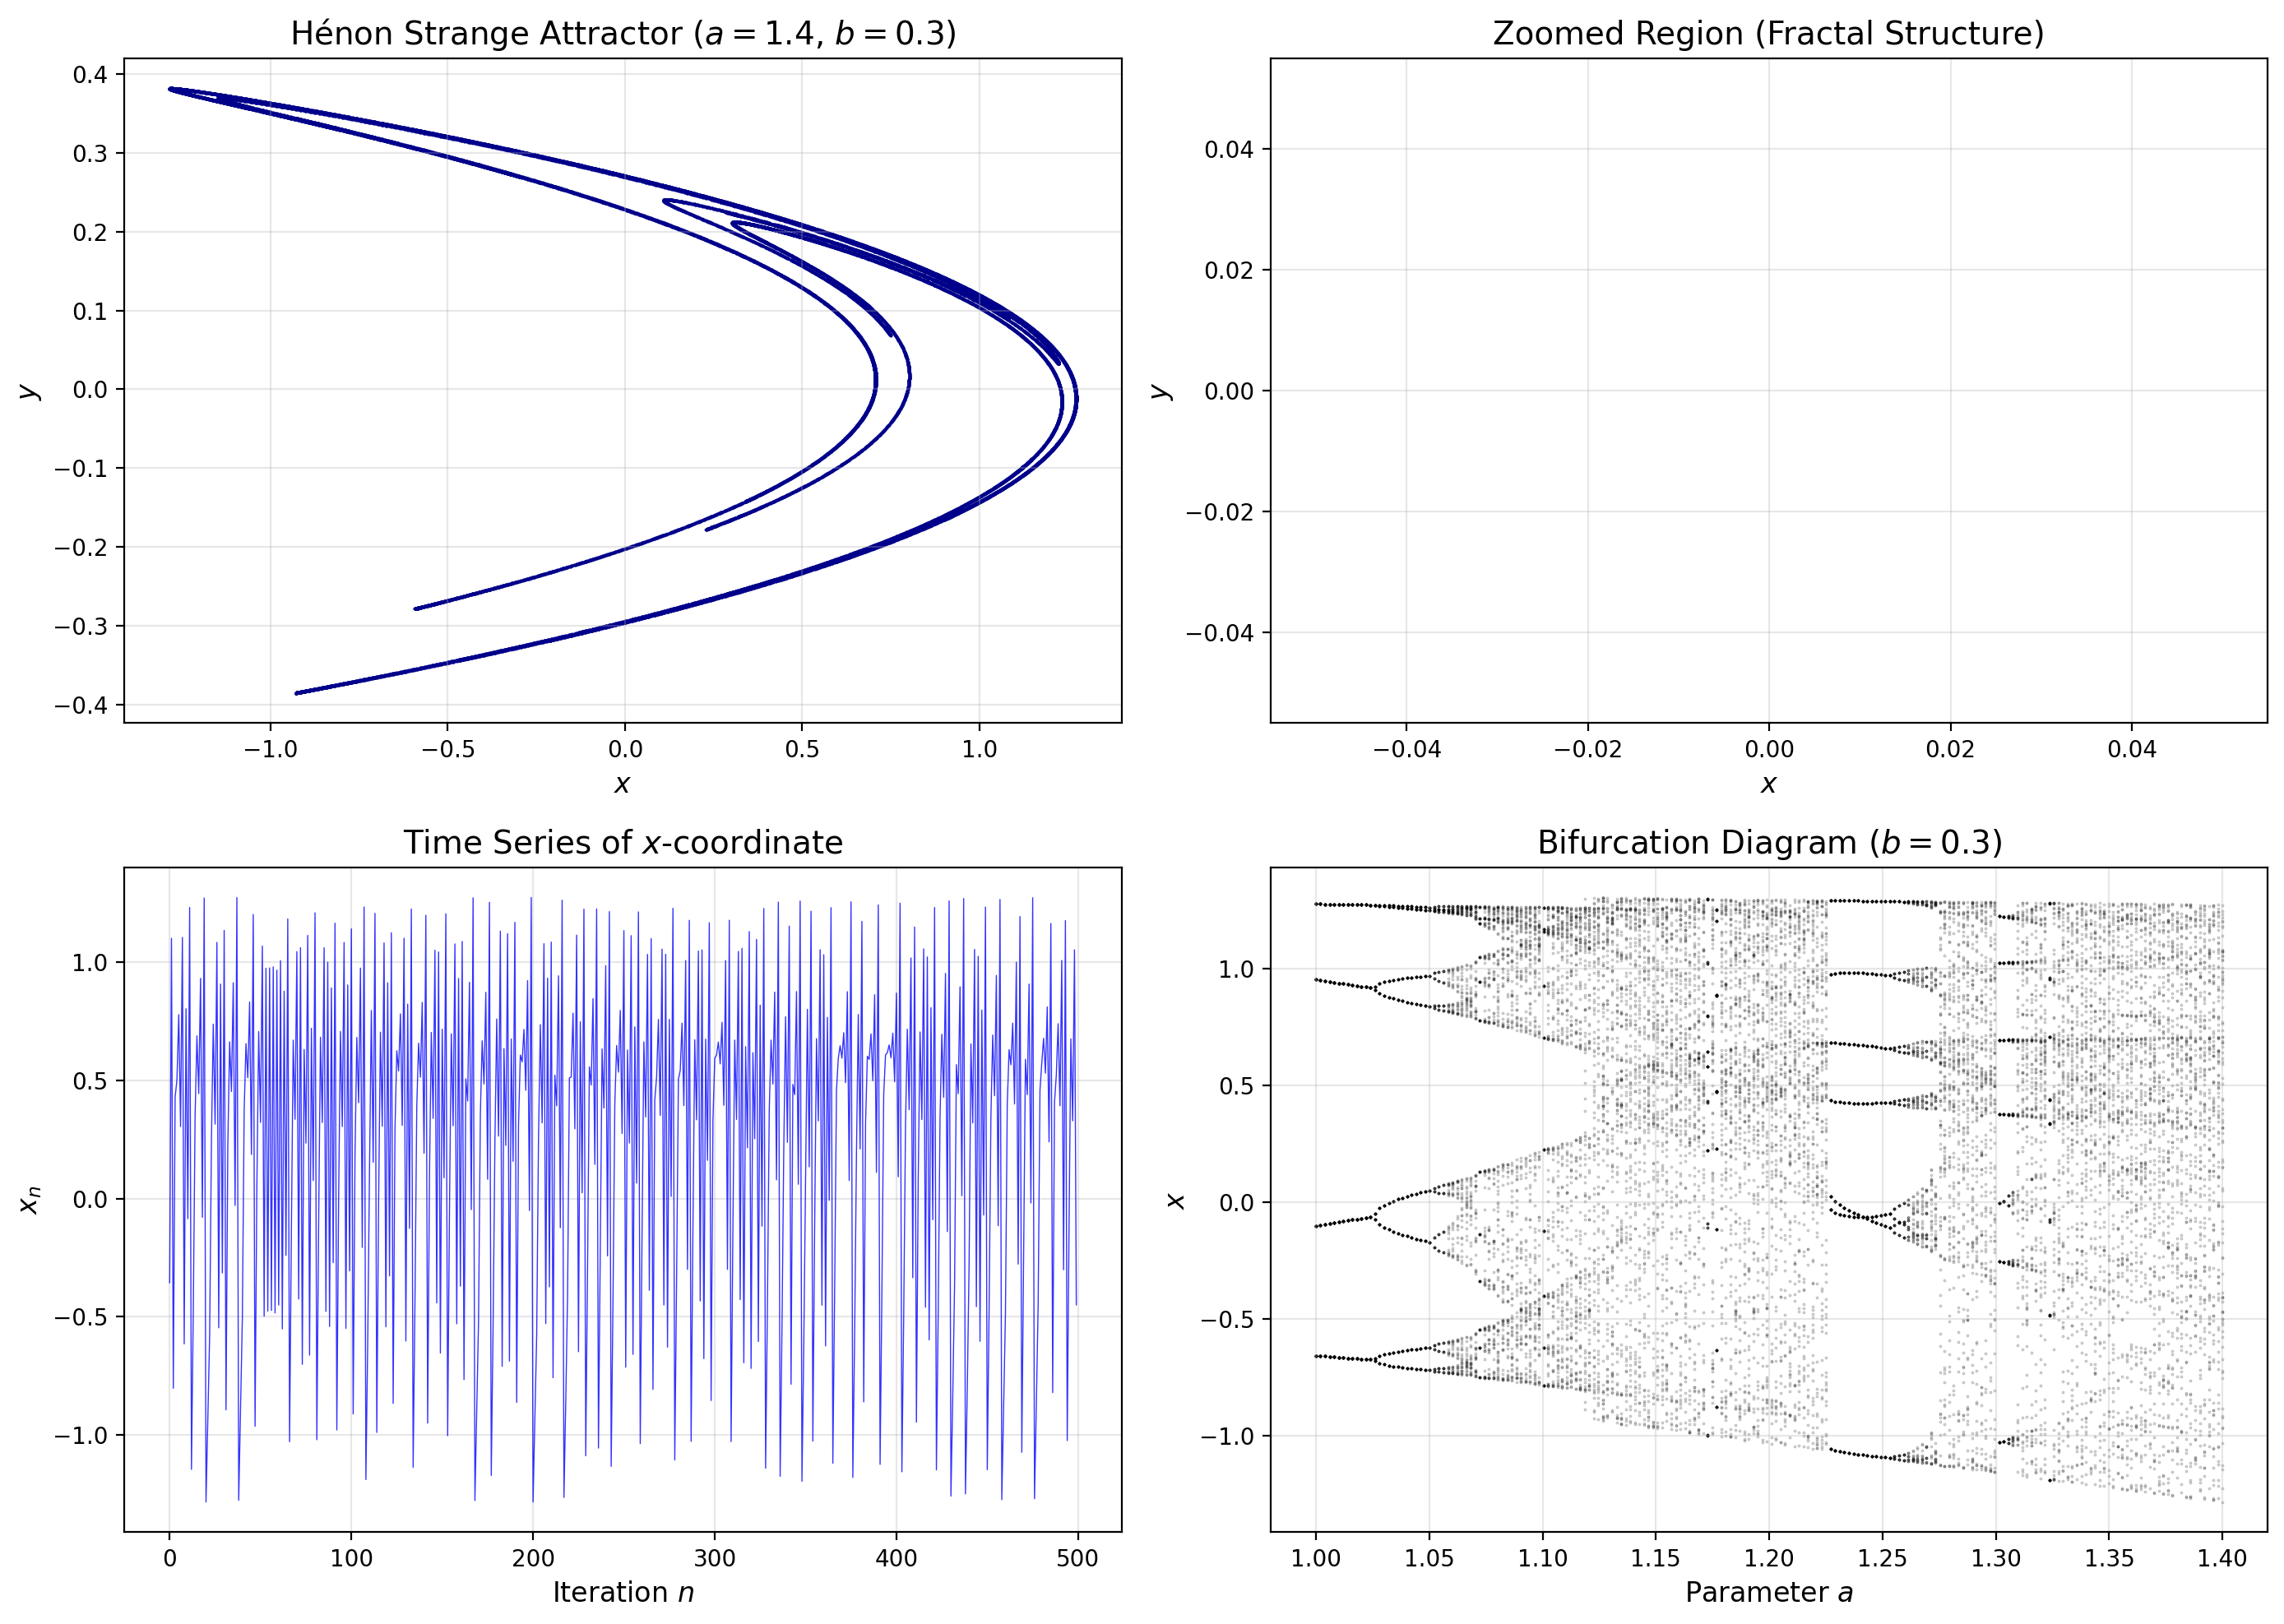


Figure saved to 'plot.png'


In [5]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 10))

# Main attractor plot
ax1 = fig.add_subplot(221)
ax1.scatter(x_attractor, y_attractor, s=0.1, c='darkblue', alpha=0.5)
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)
ax1.set_title('Hénon Strange Attractor ($a=1.4$, $b=0.3$)', fontsize=14)
ax1.grid(True, alpha=0.3)

# Zoomed view showing fractal structure
ax2 = fig.add_subplot(222)
mask = (x_attractor > 0.0) & (x_attractor < 0.4) & (y_attractor > -0.1) & (y_attractor < 0.1)
ax2.scatter(x_attractor[mask], y_attractor[mask], s=0.5, c='darkred', alpha=0.6)
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('$y$', fontsize=12)
ax2.set_title('Zoomed Region (Fractal Structure)', fontsize=14)
ax2.grid(True, alpha=0.3)

# Time series of x-coordinate
ax3 = fig.add_subplot(223)
n_show = 500
ax3.plot(range(n_show), x_attractor[:n_show], 'b-', linewidth=0.5, alpha=0.8)
ax3.set_xlabel('Iteration $n$', fontsize=12)
ax3.set_ylabel('$x_n$', fontsize=12)
ax3.set_title('Time Series of $x$-coordinate', fontsize=14)
ax3.grid(True, alpha=0.3)

# Bifurcation-like visualization: vary parameter a
ax4 = fig.add_subplot(224)

a_values = np.linspace(1.0, 1.4, 200)
x_bif = []
a_bif = []

for a in a_values:
    x, y = 0.1, 0.1
    # Transient
    for _ in range(500):
        x, y = henon_map(x, y, a, 0.3)
    # Collect points
    for _ in range(100):
        x, y = henon_map(x, y, a, 0.3)
        x_bif.append(x)
        a_bif.append(a)

ax4.scatter(a_bif, x_bif, s=0.1, c='black', alpha=0.3)
ax4.set_xlabel('Parameter $a$', fontsize=12)
ax4.set_ylabel('$x$', fontsize=12)
ax4.set_title('Bifurcation Diagram ($b=0.3$)', fontsize=14)
ax4.grid(True, alpha=0.3)

plt.tight_layout()

# Save the figure
plt.savefig('henon_map_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Conclusions

The Hénon map demonstrates that even simple nonlinear systems can exhibit extraordinarily complex behavior. Key observations:

1. **Strange Attractor**: Despite the simplicity of the equations, the map produces a fractal attractor with infinite detail at all scales.

2. **Dissipation**: The parameter $|b| < 1$ ensures contraction of phase space volume, allowing trajectories to settle onto the attractor.

3. **Chaos**: The positive Lyapunov exponent ($\lambda \approx 0.42$) confirms exponential divergence of nearby trajectories—the hallmark of deterministic chaos.

4. **Route to Chaos**: The bifurcation diagram shows period-doubling cascades leading to chaos, a universal route observed in many dynamical systems.

The Hénon map remains a fundamental testbed for studying chaotic dynamics, control methods, and synchronization phenomena in discrete-time systems.